# Clustering vs PCA
### Linsheng Liu
### Some mistakes are corrected and more tests are made with the helping of the following codes: 
### https://www.kaggle.com/ruslankl/k-means-clustering-pca

In [15]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

In [16]:
np.random.seed(13)

In [17]:
import os
cwd = os.getcwd()

In [18]:
Data = pd.read_csv(cwd+'\\inputs\\train.csv') 

In [19]:
Data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
2883,8250,WALKING_UPSTAIRS,0.322,-0.04320,-0.1580,-0.2150,-0.360,0.00255,-0.241,-0.331,...,0.210,-0.8270,-0.980,-0.40100,-0.6900,-0.8990,0.3970,-0.566,0.0323,0.3230
2852,8143,SITTING,0.221,-0.08730,0.0441,-0.8100,-0.306,-0.03280,-0.813,-0.256,...,0.244,-0.3400,-0.626,-0.00277,-0.0367,-0.2690,0.0561,-0.801,0.1860,-0.0929
3492,9941,STANDING,0.279,-0.01920,-0.1050,-0.9950,-0.929,-0.93900,-0.996,-0.923,...,0.204,-0.5510,-0.855,-0.12300,-0.0261,0.7580,0.8370,-0.855,0.1880,0.0646
908,2592,SITTING,0.279,-0.01680,-0.1070,-0.9980,-0.987,-0.98200,-0.998,-0.988,...,0.576,-0.7220,-0.897,-0.30500,-0.3800,0.0581,0.9230,-0.931,0.0620,-0.0191
1382,3928,WALKING,0.335,0.00837,-0.1380,-0.0779,0.270,-0.03720,-0.163,0.296,...,0.249,0.0272,-0.347,-0.35500,0.0129,0.8580,0.7860,-0.767,0.2150,0.1330


In [20]:
print('Shape of the data set: ' + str(Data.shape))

Shape of the data set: (3609, 563)


In [21]:
#save labels as string
Labels = Data['activity']
Data = Data.drop(['rn', 'activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [22]:
#check for missing values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [23]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

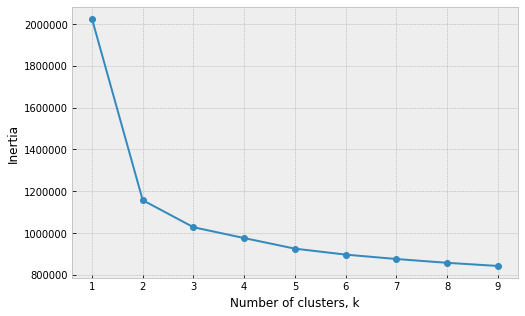

In [24]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

### It is sort of the Sum of squared error within group method to find the best k, which is 2 here.  

In [25]:
def k_means(n_clust, data_frame, true_labels):
    """
    Function k_means applies k-means clustering alrorithm on dataset and prints the crosstab of cluster and actual labels 
    and clustering performance parameters.
    
    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels
    
    Output:
    1 - crosstab of cluster and actual labels
    2 - performance table
    """
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

In [26]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


1156484   0.378   0.981   0.546   0.329   0.378    0.390


In [27]:
k_means(n_clust=3, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,6,3,1,442,198,503
1,675,620,667,0,0,0
2,0,0,0,161,295,38


inertia  homo    compl   v-meas   ARI     AMI     silhouette


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


1027054   0.406   0.748   0.526   0.335   0.405    0.320


In [28]:
k_means(n_clust=4, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,194,225,290,0,0,2
1,0,0,0,159,293,38
2,486,398,378,0,0,0
3,1,0,0,444,200,501


inertia  homo    compl   v-meas   ARI     AMI     silhouette


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


975186   0.413   0.558   0.475   0.300   0.413    0.162


In [29]:
k_means(n_clust=5, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,0,0,0,245,310,97
1,194,225,292,0,0,1
2,1,1,0,333,109,440
3,486,397,376,0,0,0
4,0,0,0,25,74,3


inertia  homo    compl   v-meas   ARI     AMI     silhouette


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


924537   0.418   0.517   0.462   0.290   0.417    0.138


In [30]:
k_means(n_clust=6, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,554,21,0,0,0,0
1,0,0,0,248,311,97
2,1,0,0,329,107,438
3,20,445,479,0,0,0
4,0,0,0,26,75,4
5,106,157,189,0,0,2


inertia  homo    compl   v-meas   ARI     AMI     silhouette


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


895967   0.548   0.589   0.568   0.429   0.547    0.113


In [31]:
k_means(n_clust=7, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,106,156,190,0,0,0
1,0,0,0,314,189,125
2,1,1,0,179,53,392
3,0,0,0,97,205,23
4,554,23,0,0,0,0
5,0,0,0,13,46,1
6,20,443,478,0,0,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


874823   0.562   0.559   0.560   0.431   0.557    0.087


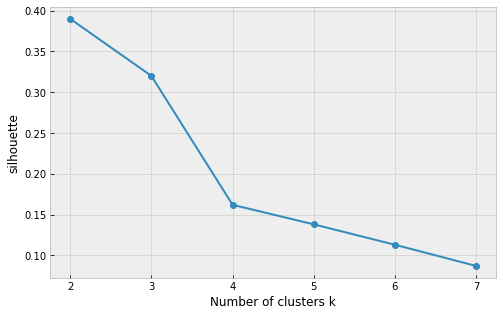

In [59]:
silhouette = [0.39, 0.32, 0.162, 0.138, 0.113, 0.087]
k = [2, 3, 4, 5, 6, 7]
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(k, silhouette, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('silhouette')
plt.show()

In [40]:
#change labels into binary: 0 - not moving, 1 - moving
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
Labels_binary = np.array(Labels_binary.astype(int))

In [45]:
from datetime import datetime
start=datetime.now()

k_means(n_clust=2, data_frame=Data, true_labels=Labels_binary)

print("The runtime of clustering is")
print(datetime.now()-start)

orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


1156484   0.977   0.978   0.978   0.991   0.977    0.390
The runtime of clustering is
0:00:01.702866


In [46]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels_binary)

orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


1156484   0.977   0.978   0.978   0.991   0.977    0.390


## PCA

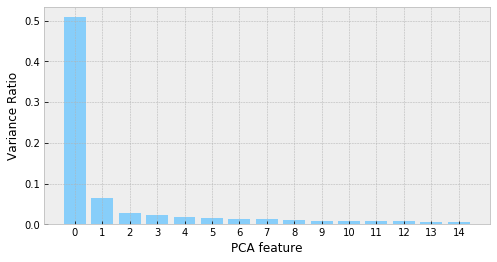

In [48]:
#check for optimal number of features
pca = PCA(random_state=13)
pca.fit(Data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_ratio_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance Ratio')
plt.xticks(features[:15])
plt.show()

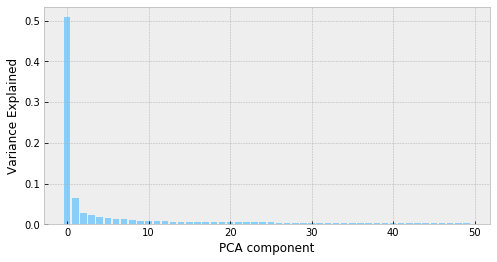

In [90]:
var = np.zeros(50)
for i in range(50):
    var[i] = pca.explained_variance_ratio_[i]
plt.figure(figsize=(8,4))
plt.bar(features[:50], var, color='lightskyblue')
plt.xlabel('PCA component')
plt.ylabel('Variance Explained')
plt.show()

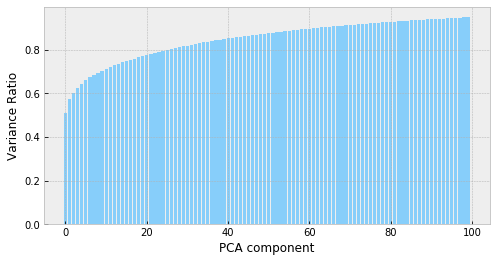

In [49]:
sumvar = np.zeros(100)
for i in range(100):
    if i == 0:
        sumvar[i] = pca.explained_variance_ratio_[i]
    else:
        sumvar[i] = pca.explained_variance_ratio_[i] + sumvar[i-1]
plt.figure(figsize=(8,4))
plt.bar(features[:100], sumvar, color='lightskyblue')
plt.xlabel('PCA component')
plt.ylabel('Variance Ratio')
plt.show()

In [81]:
features

range(0, 561)

In [50]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(Data)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [ ]:
# pca_transform(n_comp=3)
# k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels)

In [51]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1971,8
1,1,1629


inertia  homo    compl   v-meas   ARI     AMI     silhouette
168716   0.976   0.976   0.976   0.990   0.976    0.794


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [52]:
pca_transform(n_comp=2)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 2)


orig_label,0,1
clust_label,,
0,1969,6
1,3,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
295753   0.975   0.975   0.975   0.990   0.975    0.694


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [53]:
pca_transform(n_comp=4)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 4)


orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
397317   0.977   0.978   0.978   0.991   0.977    0.632


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [54]:
pca_transform(n_comp=8)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 8)


orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
518946   0.977   0.978   0.978   0.991   0.977    0.571


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [55]:
pca_transform(n_comp=16)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 16)


orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
646117   0.977   0.978   0.978   0.991   0.977    0.522


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [56]:
pca_transform(n_comp=32)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 32)


orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
797498   0.977   0.978   0.978   0.991   0.977    0.472


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [57]:
pca_transform(n_comp=64)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 64)


orig_label,0,1
clust_label,,
0,1970,6
1,2,1631


inertia  homo    compl   v-meas   ARI     AMI     silhouette
956188   0.977   0.978   0.978   0.991   0.977    0.432


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


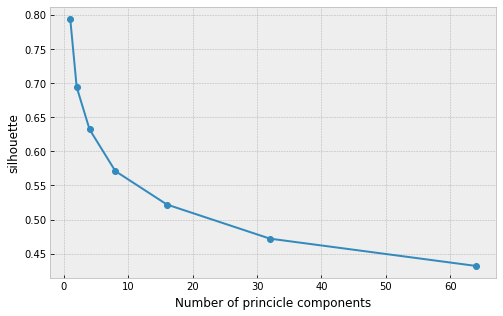

In [61]:
silhouette = [0.794, 0.694, 0.632, 0.571, 0.522, 0.472, 0.432]
k = [1, 2, 4, 8, 16, 32, 64]
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(k, silhouette, '-o')
plt.xlabel('Number of princicle components')
plt.ylabel('silhouette')
plt.show()

In [62]:
from datetime import datetime
start=datetime.now()

pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

print("The runtime of PCA is")
print(datetime.now()-start)

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1971,8
1,1,1629


inertia  homo    compl   v-meas   ARI     AMI     silhouette
168716   0.976   0.976   0.976   0.990   0.976    0.794
The runtime of PCA is
0:00:00.266983


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
